In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sodapy import Socrata
from funciones import numerize



1 - ¿Cuáles fueron los 5 Estados con mayor ocupación hospitalaria por COVID? Criterio de ocupación por cama común.
 Considere la cantidad de camas ocupadas con pacientes confirmados y tome como referencia los 6 primeros meses del 2020 - recuerde incluir la cifra de infectados en esos meses (acumulativo).
 ¿Influye el rango etario en este comportamiento?

In [2]:
client = Socrata("healthdata.gov",
                 app_token="L67KNyC9J4wO007XLxv0oJlDZ",
                 username="agustin.ojeda.90@gmail.com",
                 password="")

In [3]:
#Primer query OK
results = client.get("g62h-syeh",
                    select="state as estado, date as fecha, inpatient_beds_used_covid as pacientes_covid",
                    where="date between '2020-01-01T00:00:00' and '2020-07-01T00:00:00' and pacientes_covid IS NOT NULL",
                    order="pacientes_covid desc",
                    limit = 100)

results_df = pd.DataFrame.from_records(results,coerce_float=True)
results_df['pacientes_covid'] = pd.to_numeric(results_df.pacientes_covid)
results_df.sort_values(by='pacientes_covid', ascending=False).drop_duplicates('estado')

ReadTimeout: HTTPSConnectionPool(host='healthdata.gov', port=443): Read timed out. (read timeout=10)

In [ ]:
results = client.get("g62h-syeh",
                    select="state as estado, date as fecha, inpatient_beds_used_covid as pacientes_covid",
                    where="date between '2020-01-01T00:00:00' and '2020-07-01T00:00:00' and pacientes_covid IS NOT NULL",
                    order="pacientes_covid desc",
                    limit = 100)

Consulta que columna usaron para los confirmados

In [90]:
#columna 17 y 22 previos confirmados
#columna 33 y 34 total confirmados por edad
results = client.get("g62h-syeh",
                    select='''state as estado, date as fecha,
                              inpatient_beds_used_covid as pacientes_covid,
                              total_adult_patients_hospitalized_confirmed_covid as adultos_confirmados,
                              total_pediatric_patients_hospitalized_confirmed_covid as niños_confirmados
                              ''',
                    where="date between '2020-01-01T00:00:00' and '2020-07-01T00:00:00' and pacientes_covid IS NOT NULL",
                    limit = 5000)

ReadTimeout: HTTPSConnectionPool(host='healthdata.gov', port=443): Read timed out. (read timeout=10)

In [165]:
df = pd.DataFrame.from_records(results)

In [ ]:
df.sort_values(by='pacientes_covid', ascending=False).head(50)

<AxesSubplot:ylabel='Frequency'>

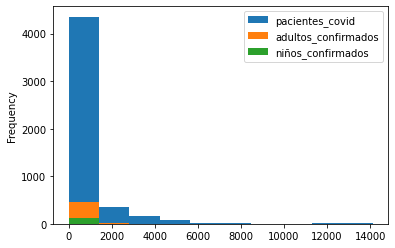

In [170]:
df.plot(kind='hist')

2 - Analice la ocupación de camas (Común) por COVID en el Estado de Nueva York durante la cuarentena establecida e indique:

Intervalos de crecimiento y decrecimiento
Puntos críticos (mínimos y máximos)

In [5]:
#Primer query OK
results_2 = client.get("g62h-syeh",
                    select="state as estado, date as fecha, inpatient_beds_used_covid as pacientes_covid",
                    where="date between '2020-01-01T00:00:00' and '2020-07-01T00:00:00' and pacientes_covid IS NOT NULL and estado = 'NY'",
                    order="pacientes_covid desc",
                    limit = 1000)

#results_df.sort_values(by='pacientes_covid', ascending=False).drop_duplicates('estado')

In [6]:

df2 = pd.DataFrame.from_records(results_2,coerce_float=True)
numerize(df2)


Not posible to convert:
estado


3 - ¿Cuáles fueron los cinco Estados que más camas UCI -Unidades de Cuidados Intensivos- utilizaron durante el año 2020? La medición debe realizarse en términos absolutos.

In [ ]:
#53. Percentage of total staffed adult ICU beds
#    adult_icu_bed_utilization
#or
#57. Percentage of staffed adult ICU beds that are being utilized in this state.
#   adult_icu_bed_covid_utilization

#adult_icu_bed_covid_utilization_numerator

In [20]:
results_3 = client.get("g62h-syeh",
                    select="state as estado, date as fecha, adult_icu_bed_utilization as adultos_cuidados_intensivos",
                    where="date between '2020-01-01T00:00:00' and '2021-01-01T00:00:00'",
                    limit = 50000)
df3 = pd.DataFrame.from_records(results_3,coerce_float=True)
numerize(df3)



Not posible to convert:
estado


In [27]:
df3.adultos_cuidados_intensivos.max()

58.4950634696756

In [ ]:
df3.sort_values(by='adultos_cuidados_intensivos', ascending=False).drop_duplicates('estado')

In [29]:
results_3b = client.get("g62h-syeh",
                    select="state as estado, date as fecha, adult_icu_bed_covid_utilization_numerator as adultos_cuidados_intensivos",
                    where="date between '2020-01-01T00:00:00' and '2021-01-01T00:00:00'",
                    limit = 50000)
df3 = pd.DataFrame.from_records(results_3b,coerce_float=True)
numerize(df3)


Not posible to convert:
estado


In [32]:
df3.sort_values(by='adultos_cuidados_intensivos', ascending=False).drop_duplicates('estado')

,estado,fecha,adultos_cuidados_intensivos
16419,CA,2020-12-31,4587.0
16420,TX,2020-12-31,3290.0
7951,FL,2020-07-24,2493.0
15514,PA,2020-12-14,1418.0
16450,NY,2021-01-01,1408.0
15570,OH,2020-12-15,1339.0
14477,IL,2020-11-24,1239.0
16438,GA,2020-12-31,1210.0
16271,AZ,2020-12-28,1040.0
14651,MI,2020-11-28,904.0


4 - ¿Qué cantidad de camas se utilizaron, por Estado, para pacientes pediátricos con COVID durante el 2020?

In [ ]:
# 37. Reported patients currently hospitalized in a pediatric inpatient bed, including NICU, newborn, and nursery,
#  who are laboratory-confirmed-positive for COVID-19. This include those in observation beds.
# Code total_pediatric_patients_hospitalized_confirmed_covid

#tambien esta all_pediatric_inpatient_bed_occupied pero no es solo para covicheados 

#CAMBIAR FECHA AL 20-12-31

##PREGUNTA. LA COLUMNA NOS DICE LAS CAMAS QUE SE ESTAN USANDO POR DIA POR LO QUE NO PODEMOS SUMAR
            USE MAX PORQUE REPRESENTA EL NUMERO MAXIMO DE CAMAS USADAS AL QUE SE LLEGO

In [33]:
results_4 = client.get("g62h-syeh",
                    select="state as estado, date as fecha, adult_icu_bed_covid_utilization_numerator as adultos_cuidados_intensivos",
                    where="date between '2020-01-01T00:00:00' and '2021-01-01T00:00:00'",
                    limit = 50000)
df4 = pd.DataFrame.from_records(results_4,coerce_float=True)
numerize(df4)


Not posible to convert:
estado


In [38]:

df4.drop(columns='fecha').groupby('estado').max()

,adultos_cuidados_intensivos
estado,
AK,43.0
AL,798.0
AR,357.0
AZ,1040.0
CA,4587.0
CO,526.0
CT,270.0
DC,83.0
DE,67.0


5 - ¿Qué porcentaje de camas UCI corresponden a casos confirmados de COVID-19? Agrupe por Estado.

In [ ]:
# adult_icu_bed_covid_utilization
'''
Consulta, cómo calculo porcentaje y a su vez agrupo por Estado en una línea de tiempo,
 tengo la cantidad de camas fijas pero la ocupación es variable.. Escucho sugerencias

Misma duda... Se me ocurre poner el porcentaje máximo en el período dado. La media no tendría mucho sentido y
 la suma menos que menos. La otra es que, aunque claramente diga 'agrupe' no haya que hacer un groupby y simplemente plotear los cambios diferenciando los Estados,
 de esa manera si se podrían ver los porcentajes en todo el período diferenciando por Estado.
'''

53. Percentage of total staffed adult ICU beds currently utilized by patients who have suspected or confirmed COVID-19 in this state. This number only accounts for hospitals in the state that report both "staffedicuadultpatientsconfirmedandsuspectedcovid" and "totalstaffedadulticu_beds" fields.

In [76]:
results_5 = client.get("g62h-syeh",
                    select="state as estado, date as fecha, adult_icu_bed_covid_utilization as porcentaje_adultos_cuidados_intensivos",
                    where="date between '2020-07-01T00:00:00' and '2021-01-01T00:00:00'",
                    limit = 50000)
df5 = pd.DataFrame.from_records(results_5,coerce_float=True)
numerize(df5)


Not posible to convert:
estado


In [81]:
df5.drop(columns='fecha').groupby('estado').max()

,porcentaje_adultos_cuidados_intensivos
estado,
AK,0.333333
AL,0.543597
AR,0.803738
AZ,0.578295
CA,0.538065
CO,0.354336
CT,0.246350
DC,0.256173
DE,0.348958


<AxesSubplot:xlabel='fecha', ylabel='porcentaje_adultos_cuidados_intensivos'>

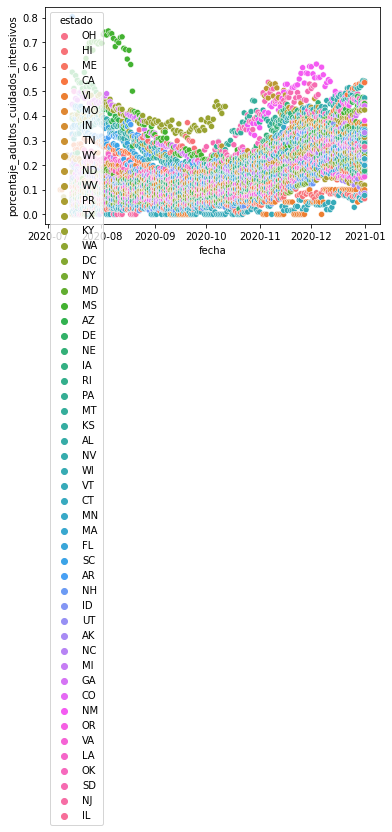

In [44]:
# Se me ocurrió que esta es la única manera de {agrupar por estados},  
# Para aclarar el gráfico tomar los estados mas relevantes teniendo com citerio la meida o el maximo
sns.scatterplot(data=df5, x='fecha', y='porcentaje_adultos_cuidados_intensivos', hue='estado')

6 - ¿Cuántas muertes por covid hubo, por Estado, durante el año 2021?

In [82]:
results_6 = client.get("g62h-syeh",
                    select="state as estado, date as fecha, deaths_covid as muertes_covid",
                    where="date between '2021-01-01T00:00:00' and '2021-12-31T00:00:00'",
                    limit = 50000)
df6 = pd.DataFrame.from_records(results_6,coerce_float=True)
numerize(df6)


Not posible to convert:
estado


In [83]:
df6.

,estado,fecha,muertes_covid
0,RI,2021-01-01,16
1,SC,2021-01-01,31
2,ID,2021-01-01,10
3,MT,2021-01-01,3
4,UT,2021-01-01,3
...,...,...,...
19470,OH,2021-12-31,90
19471,NH,2021-12-31,10
19472,VI,2021-12-31,0
19473,IN,2021-12-31,55


In [85]:
df6.groupby('estado').sum().sort_values(by='muertes_covid', ascending=False).to_csv('deaths_by_state.csv')

7 - ¿Qué relación presenta la falta de camas UCI disponibles con la cantidad de muertes durante el año 2021?

53. Percentage of total staffed adult ICU beds currently utilized by patients who have suspected or confirmed COVID-19 in this state. This number only accounts for hospitals in the state that report both "staffedicuadultpatientsconfirmedandsuspectedcovid" and "totalstaffedadulticu_beds" fields.

adult_icu_bed_covid_utilization

In [55]:
result_7 = client.get("g62h-syeh",
                    select="state as estado, date as fecha, deaths_covid as muertes_covid, adult_icu_bed_covid_utilization as camas_icu ",
                    where="date between '2021-01-01T00:00:00' and '2021-12-31T00:00:00'",
                    limit = 50000)
df7 = pd.DataFrame.from_records(result_7,coerce_float=True)
numerize(df7)


Not posible to convert:
estado


In [58]:
df7.corr()

,muertes_covid,camas_icu
muertes_covid,1.000000,0.442572
camas_icu,0.442572,1.000000


<AxesSubplot:xlabel='camas_icu', ylabel='muertes_covid'>

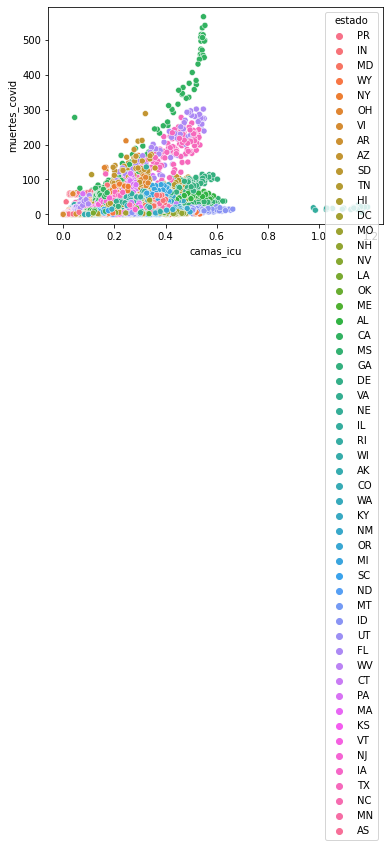

In [71]:
sns.scatterplot(x='camas_icu', y='muertes_covid', data=df7, hue='estado')

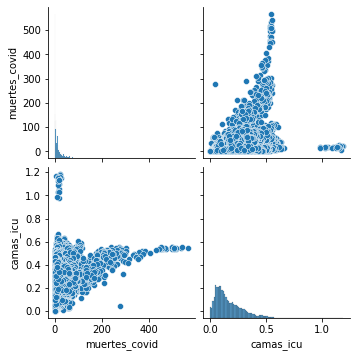

In [70]:
sns.pairplot(df7)

7 - ¿Qué relación presenta la falta de personal médico, con la cantidad de muertes por covid durante el año 2021?

8 - Siguiendo las respuestas anteriores, ¿cuál fue el peor mes de la pandemia para USA en su conjunto? Puede utilizar otras medidas que considere necesarias.

In [72]:
del df7

In [89]:
results_7 = client.get("g62h-syeh",
                    select="state as estado, date as fecha, deaths_covid as muertes_covid, adult_icu_bed_covid_utilization as camas_icu ",
                    limit = 50000)
df7 = pd.DataFrame.from_records(results_7,coerce_float=True)
numerize(df7)

ReadTimeout: HTTPSConnectionPool(host='healthdata.gov', port=443): Read timed out. (read timeout=10)

<AxesSubplot:xlabel='fecha', ylabel='muertes_covid'>

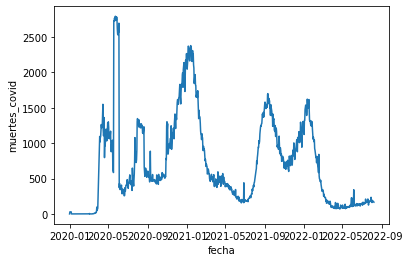

In [75]:
sns.lineplot(x='fecha',y='muertes_covid', data=df7.groupby('fecha').sum())